In [1]:
! pip install xgboost


[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## Import important Libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# upload data
data=pd.read_csv("Breast Cancer Wisconsin - Breast Cancer Wisconsin.csv")
#Sisplayinng random data from the data set
data.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
164,8712289,M,23.270,22.04,152.10,1686.0,0.08439,0.11450,0.13240,0.097020,...,28.010,28.22,184.20,2403.0,0.12280,0.35830,0.39480,0.23460,0.3589,0.09187
46,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409
321,894618,M,20.160,19.66,131.10,1274.0,0.08020,0.08564,0.11550,0.077260,...,23.060,23.03,150.20,1657.0,0.10540,0.15370,0.26060,0.14250,0.3055,0.05933
215,8810987,M,13.860,16.93,90.96,578.9,0.10260,0.15170,0.09901,0.056020,...,15.750,26.93,104.40,750.1,0.14600,0.43700,0.46360,0.16540,0.3630,0.10590
382,90250,B,12.050,22.72,78.75,447.8,0.06935,0.10730,0.07943,0.029780,...,12.570,28.71,87.36,488.4,0.08799,0.32140,0.29120,0.10920,0.2191,0.09349
192,875099,B,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.000000,...,9.968,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559
146,869691,M,11.800,16.58,78.99,432.0,0.10910,0.17000,0.16590,0.074150,...,13.740,26.38,91.93,591.7,0.13850,0.40920,0.45040,0.18650,0.5774,0.10300
313,893988,B,11.540,10.72,73.73,409.1,0.08597,0.05969,0.01367,0.008907,...,12.340,12.87,81.23,467.8,0.10920,0.16260,0.08324,0.04715,0.3390,0.07434
227,88147102,B,15.000,15.51,97.45,684.5,0.08371,0.10960,0.06505,0.037800,...,16.410,19.31,114.20,808.2,0.11360,0.36270,0.34020,0.13790,0.2954,0.08362
376,901315,B,10.570,20.22,70.15,338.3,0.09073,0.16600,0.22800,0.059410,...,10.850,22.82,76.51,351.9,0.11430,0.36190,0.60300,0.14650,0.2597,0.12000


In [4]:
#dimension of the data and the name of the columns
data.shape, data.columns

((569, 32),
 Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
        'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
        'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
        'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
        'fractal_dimension_se', 'radius_worst', 'texture_worst',
        'perimeter_worst', 'area_worst', 'smoothness_worst',
        'compactness_worst', 'concavity_worst', 'concave points_worst',
        'symmetry_worst', 'fractal_dimension_worst'],
       dtype='object'))

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [6]:

### structural Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
## Checking for null values
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [9]:
# Distribution of target variable
print("\nDistribution of target variable:")
count_diagnosis=data['diagnosis'].value_counts()
print(count_diagnosis)


Distribution of target variable:
B    357
M    212
Name: diagnosis, dtype: int64


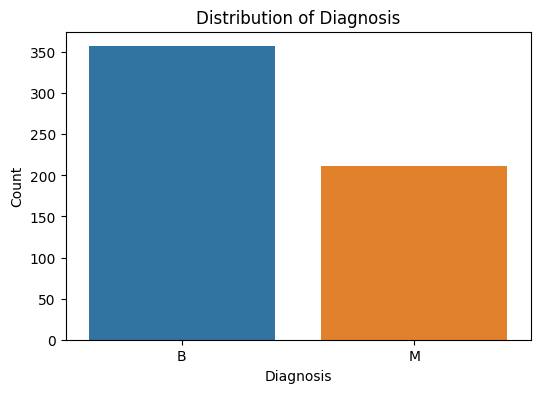

In [10]:
# Visualize the distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=data, order=data['diagnosis'].value_counts().index)
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()


c:\Python3.10\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


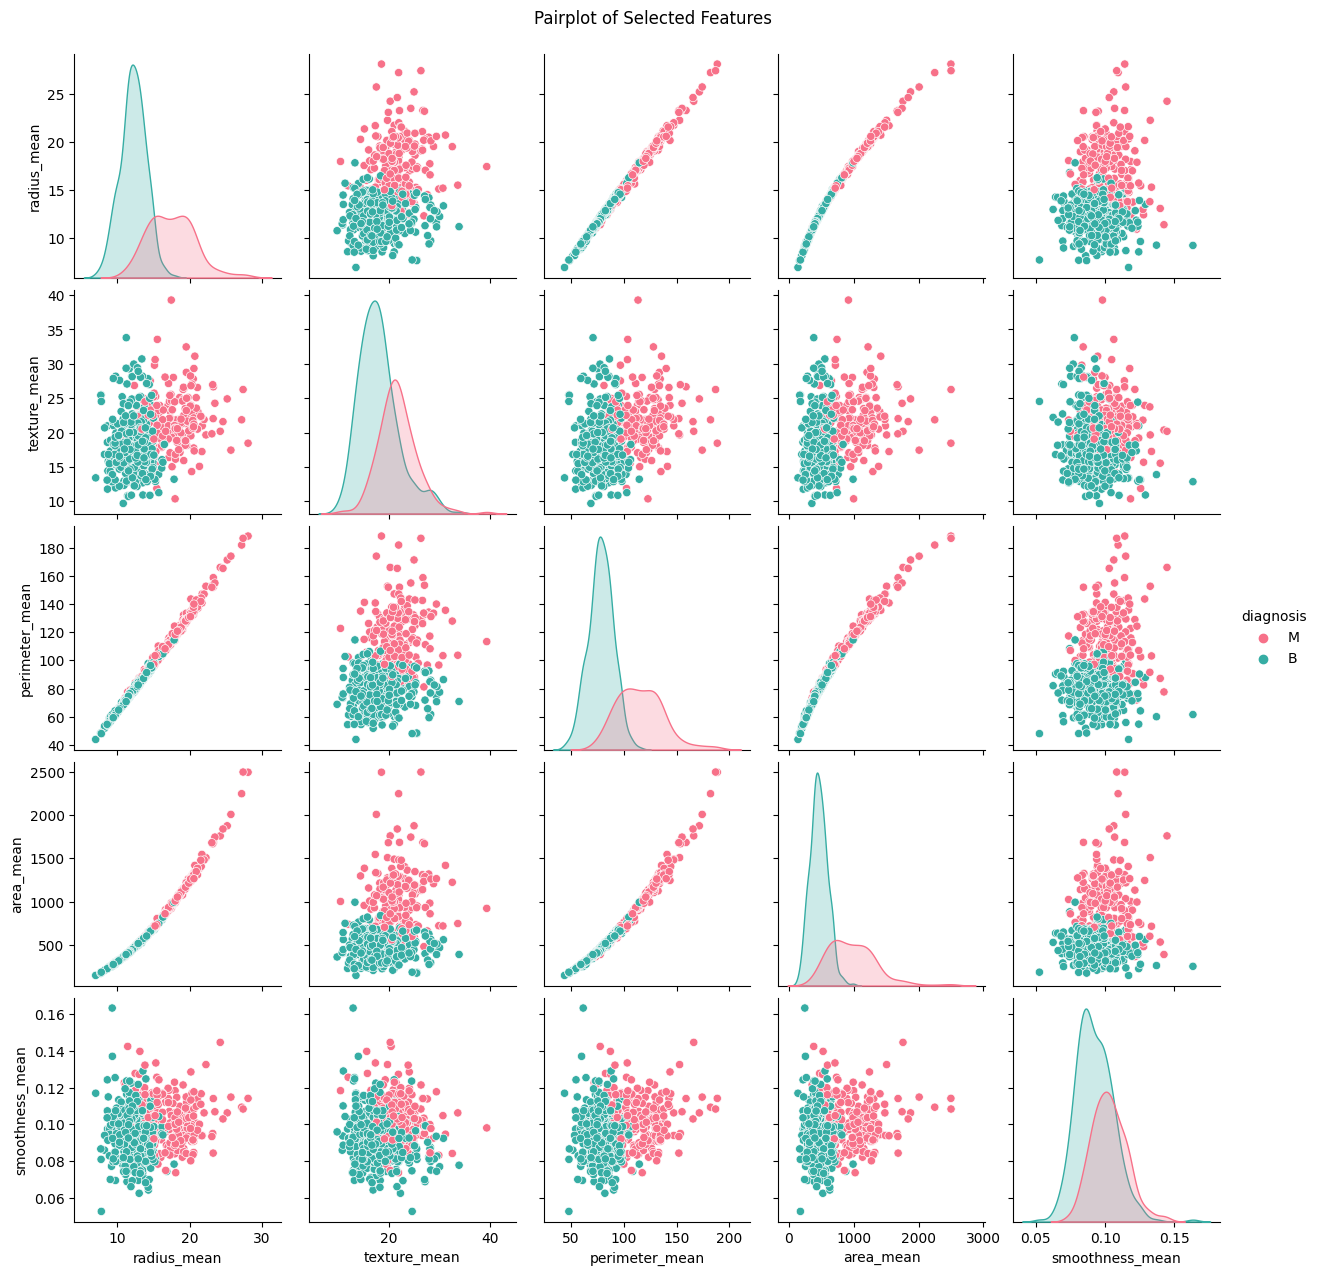

In [11]:
# Pairplot of selected features
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
sns.pairplot(data[selected_features + ['diagnosis']], diag_kind='kde', hue='diagnosis', palette='husl')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

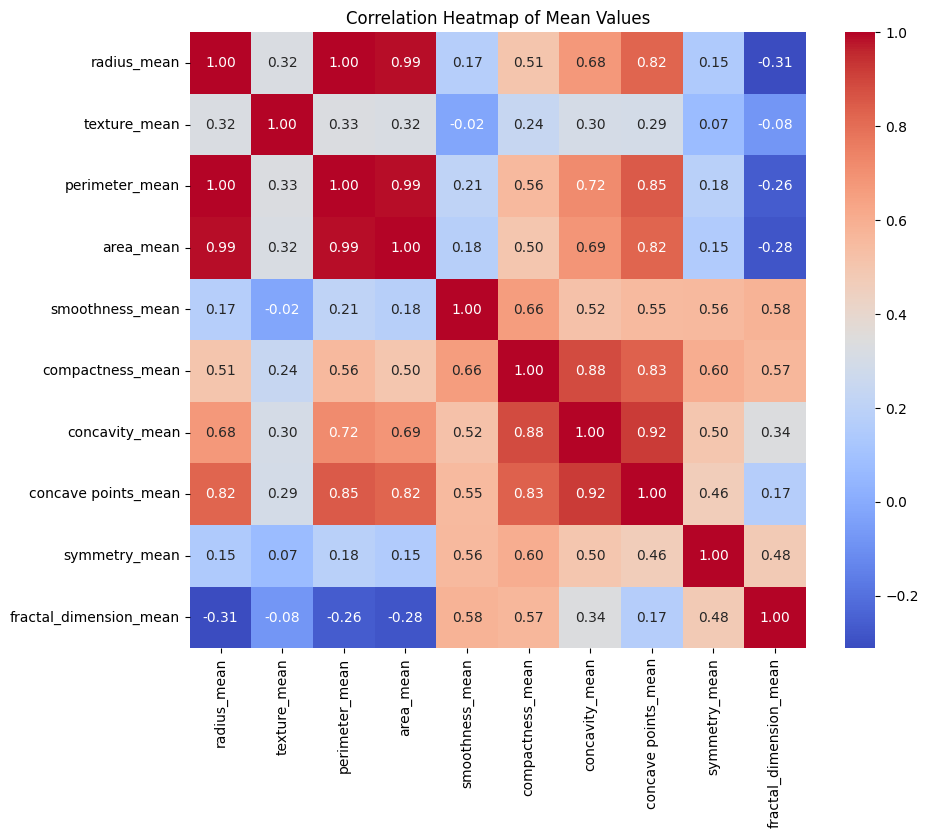

In [12]:
# Selecting columns corresponding to mean values
mean_columns = [col for col in data.columns if 'mean' in col]
mean_data = data[mean_columns]

# Compute the correlation matrix using only mean values
correlation_matrix = mean_data.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Mean Values')
plt.show()

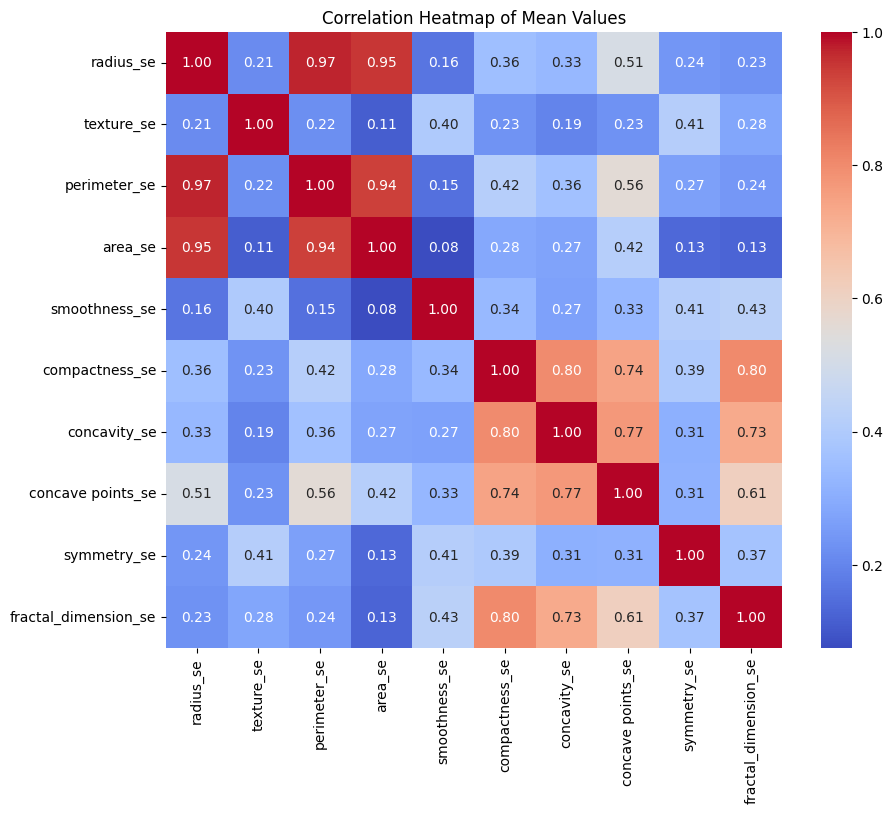

In [13]:
# Selecting columns corresponding to standard error values
se_columns = [col for col in data.columns if 'se' in col]
se_data = data[se_columns]

# Compute the correlation matrix using only mean values
correlation_matrix = se_data.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Mean Values')
plt.show()

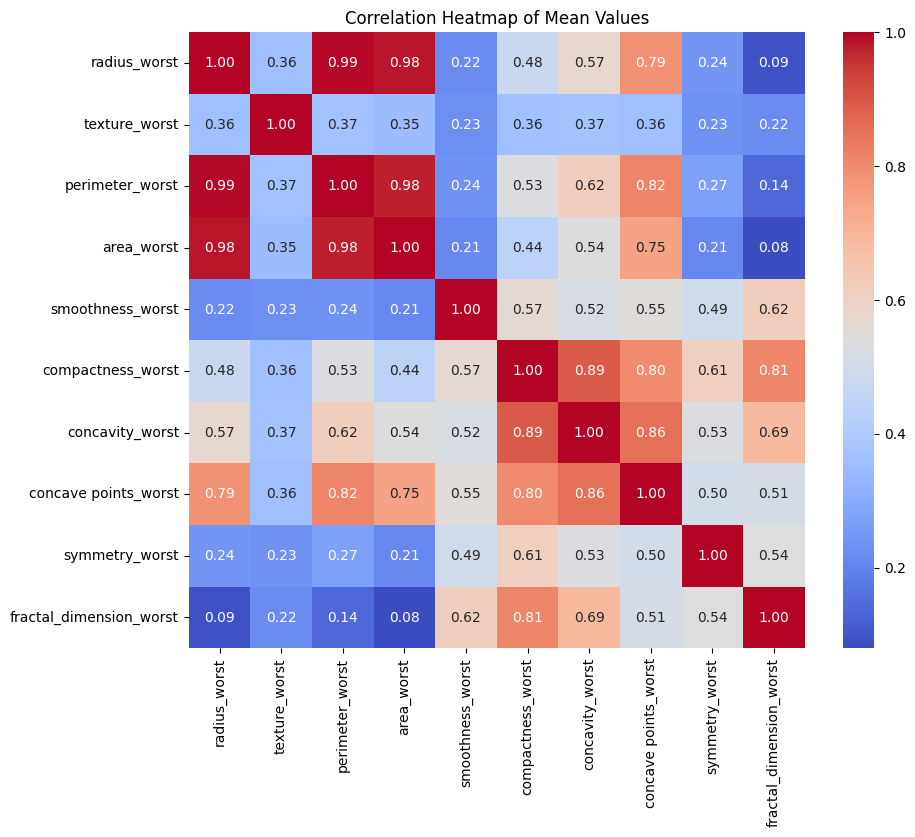

In [14]:
# Selecting columns corresponding to worst values
worst_columns = [col for col in data.columns if 'worst' in col]
worst_data = data[worst_columns]

# Compute the correlation matrix using only mean values
correlation_matrix = worst_data.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Mean Values')
plt.show()

In [15]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score



# Separate features (X) and target variable (y)
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Define scoring functions for evaluation
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, pos_label='M'),
    'recall': make_scorer(recall_score, pos_label='M'),
    'f1': make_scorer(f1_score, pos_label='M')
}

# Initialize models with default hyperparameters
models = {
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier()
}

# Define hyperparameter spaces for RandomizedSearchCV for each model
param_spaces = {
    'Random Forest': {
        'n_estimators': [10, 50, 100, 200],
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf', 'poly'],
        'gamma': ['scale', 'auto']
    },
    'KNN': {
        'n_neighbors': [3, 5, 10, 15],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'Logistic Regression': {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.5, 0.75, 1.0],
        'colsample_bytree': [0.5, 0.75, 1.0]
    }
}

# Initialize stratified k-fold cross-validation
k_folds = 5
skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Fit models using RandomizedSearchCV
for model_name, model in models.items():
    print(f"Model: {model_name}")
    
    # Initialize RandomizedSearchCV
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_spaces[model_name],
                                       scoring=scoring, refit='accuracy', n_iter=50, cv=skf, random_state=42)
    
    # Perform RandomizedSearchCV
    random_search.fit(X, y)
    
    # Print best parameters and best score
    print("Best Parameters:", random_search.best_params_)
    print("Best Score:", random_search.best_score_)
    print()


Model: Random Forest
Best Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}
Best Score: 0.9613414066138798

Model: SVM


c:\Python3.10\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
